# (Week2) ♟️小麦とチェス盤問題🌾

> If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the 
chessboard at the finish?
>
> '[Wheat and chessboard problem - Wikipedia](https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem)'

In [1]:
# 《サンプルコード》
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [2]:
# 《サンプルコード》
import numpy as np
small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [3]:
small_board_ndarray.shape

(4,)

---
## 【問題1】2×2マスのチェス盤の小麦の数

In [4]:
import numpy as np

n_squares = 4
small_board_list = [1]

for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list)

print("{0}マスの板に小麦を並べる（{1}）： \n {2} \n {3}"
      .format(
          n_squares,
          type(small_board_ndarray),
          small_board_ndarray.reshape(2, 2),
          small_board_ndarray.dtype)
     )

4マスの板に小麦を並べる（<class 'numpy.ndarray'>）： 
 [[1 2]
 [4 8]] 
 int64


```memo```

reshape()をハードコーディングでもOK
変数を与えて入れ込むと綺麗

## 【問題2】n×mマスへの拡張

In [5]:
def make_ndarray(n, m): 
    n_squares = n*m
    small_board_list = [1]
    
    for _ in range(n_squares-1):
        small_board_list.append(small_board_list[-1]*2)
        
    small_board_ndarray = np.array(small_board_list).reshape(n, m)
    return small_board_ndarray

In [6]:
n = 8
m = 8
print(make_ndarray(n, m).shape)
print(type(make_ndarray(n, m)))
print(make_ndarray(n, m))

(8, 8)
<class 'numpy.ndarray'>
[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 

## 【問題3】小麦の数の合計
[matplotlib.pyplot.bar — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html)

In [7]:
sum_ndarray = make_ndarray(n, m).sum()
print('# {0}×{1}の合計：{2}'.format(n, m, sum_ndarray))

# 8×8の合計：1.8446744073709552e+19


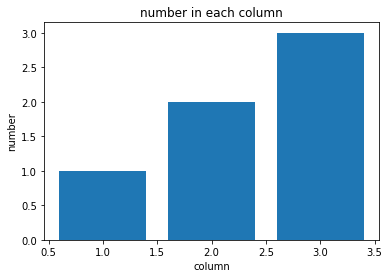

In [8]:
# 《サンプルコード》
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()

[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


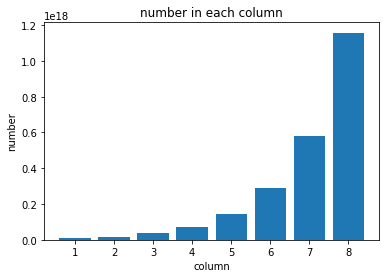

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

mean_ndarray = make_ndarray(n, m).mean(axis=0)
print(mean_ndarray)

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1, (m+1)), mean_ndarray) #1~9列の１列前までをx軸
plt.show()

## 【問題4】小麦の数のヒートマップ
[matplotlib.pyplot.pcolor — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.pcolor.html)

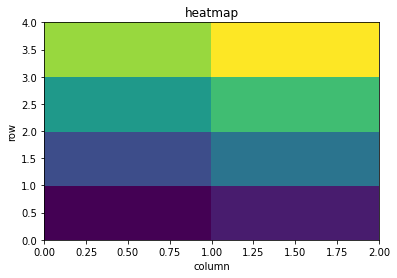

In [11]:
# 《サンプルコード》
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

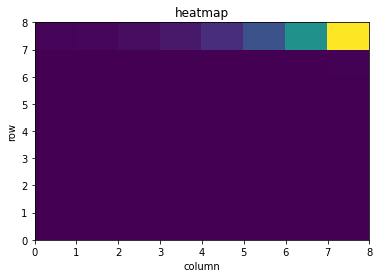

In [12]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(make_ndarray(n, m).reshape(n, m))
plt.show()

## 【問題5】後半は前半の何倍か
    チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。
    前半とは配列の0から3行目、後半は4から7行目です。

In [13]:
first_half = make_ndarray(n, m)[:4, :].sum()
latter_half = make_ndarray(n, m)[4:, :].sum()

print('# 前半：', first_half)
print('-'*30)
print('# 後半：', latter_half)
print('-'*30)

comparison = latter_half/first_half
print('# 比較：', comparison)

# 前半： 4294967295.0
------------------------------
# 後半： 1.8446744069414584e+19
------------------------------
# 比較： 4294967296.0


## 【問題6】他の計算方法によるn×mマスへの拡張

In [14]:
# ブロードキャスト関数
def make_ndarray2(n, m):
    ndarray = np.arange(n*m).astype(np.uint64)
    b_cast = 2**ndarray
    nd_board = b_cast.reshape(n, m)
    return nd_board

print('{0}\n{1}'.format(make_ndarray2(n, m).shape, make_ndarray2(n, m)))

(8, 8)
[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     14073748

In [15]:
# アペンド関数 : np.append()
def make_ndarray3(n, m):
    n_squares = n*m
    board_ndarray = np.array([1]).astype(np.uint64)

    for _ in range(n_squares - 1):
        board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
    res = board_ndarray.reshape(n, m)
    return res

print(make_ndarray3(n, m))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

<hr>
以下サンプルコード

In [ ]:
# 《サンプルコード（np.append()）》
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

In [ ]:
# 《numpyのブロードキャスト》
import numpy as np
a = np.array([0,1,2])
#ブロードキャストを使わない場合
b = np.array([5,5,5])
print(a + b)  # Out: [5,6,7]
#ブロードキャストを使う場合
print(a + 5)  # Out: [5,6,7]　※5が自動的に(1,3)の行列([5,5,5])に変換されている

> pythonのnumpyには「ブロードキャスト」という仕様があります。これはnumpyのベクトル・行列計算において、２入力間で次元数やサイズの小さい方を複製してデータを自動で統一する機能です。
>
> ブロードキャストを使うメリットとして、
> + ①コードが短くなるため、実行速度が`早くなる`。
> + ②メモリの使用量を`節約`できる。
>
> Cf. [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)

In [ ]:
# ndarrayの型問題
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808


n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808
print(board_ndarray.dtype) # int64

> int64は64ビットの整数型で、-9,223,372,036,854,775,808 ~ 9,223,372,036,854,775,807 の範囲の整数値しか扱えないことを示しています。この値は -2の64乗から2の64乗-1 です。そのため、2の64乗になる64マス目の値が範囲外となり、負の値として出てきてしまっているのです。

In [ ]:
# uint64型 ＝ 0 ~ 18,446,744,073,709,551,615 整数を扱うことができる。

n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64) # 型変換(別の型を持たせるイメージ)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808

## 【問題7】計算時間の比較

In [17]:
%%timeit
make_ndarray(n, m)

15.6 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
%%timeit
make_ndarray2(n, m)

3.42 µs ± 101 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%%timeit
make_ndarray3(n, m)

428 µs ± 27.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


(考察) 以上の３式の結果`make_ndarray2(ブロードキャスト)`の関数が早いことが分かる。